# 📊 Projektarbeit SP: Was macht ein Spiel erfolgreich?
- **Gruppe**: 12
- **Namen**: Kevin Lam, Nyma Dadutsang
- **Ziel**: "Was macht ein Spiel erfolgreich?" Analyse von Erfolgsfaktoren bei Steam-Spielen auf Basis von Bewertung, Genre, Spielzeit, Altersfreigabe etc.
- **Quelle**: Daten über RAWG API


Daten sammeln und vorbereiten

Haben Spiele mit kürzerer Spielzeit schlechtere Bewertungen?

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime
import os

# Dein API Key
API_KEY = 'f354a9b55fcc4ea3b5f54a423122569a'

if not API_KEY:
    raise ValueError("❌ API Key fehlt.")

print(f"🔑 Using API Key: {API_KEY}")

BASE_URL = 'https://api.rawg.io/api/games'
games_data = []

# Parameter
params = {
    'key': API_KEY,
    'page_size': 20,
    'ordering': '-rating'
}

page = 1
MAX_PAGES = 5  # Kannst du erhöhen!

while page <= MAX_PAGES:
    params['page'] = page
    print(f"📄 Lade Seite {page}...")

    try:
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()
        data = response.json()
    except requests.exceptions.RequestException as e:
        print(f"❌ Fehler beim Abrufen: {e}")
        break

    if 'results' not in data or not data['results']:
        print("✅ Keine weiteren Ergebnisse.")
        break

    for game in data['results']:
        # Prüfe, ob auf Steam verfügbar
        if not any(store['store']['slug'] == 'steam' for store in game.get('stores', [])):
            continue

        games_data.append({
            'name': game['name'],
            'rating': game['rating'],
            'ratings_count': game['ratings_count'],
            'playtime': game['playtime'],
            'released': game['released'],
            'genres': ', '.join([genre['name'] for genre in game['genres']]),
        })

    page += 1
    time.sleep(1)  # API nicht überlasten

print(f"🎮 Gesammelte Steam-Spiele: {len(games_data)}")

# DataFrame & Speichern
if games_data:
    df = pd.DataFrame(games_data)
    print(df.head())

    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f'steam_games_{timestamp}.csv'
    df.to_csv(filename, index=False)

    full_path = os.path.abspath(filename)
    print(f"💾 Daten gespeichert unter: {full_path}")
else:
    print("⚠️ Keine Spiele-Daten gesammelt.")


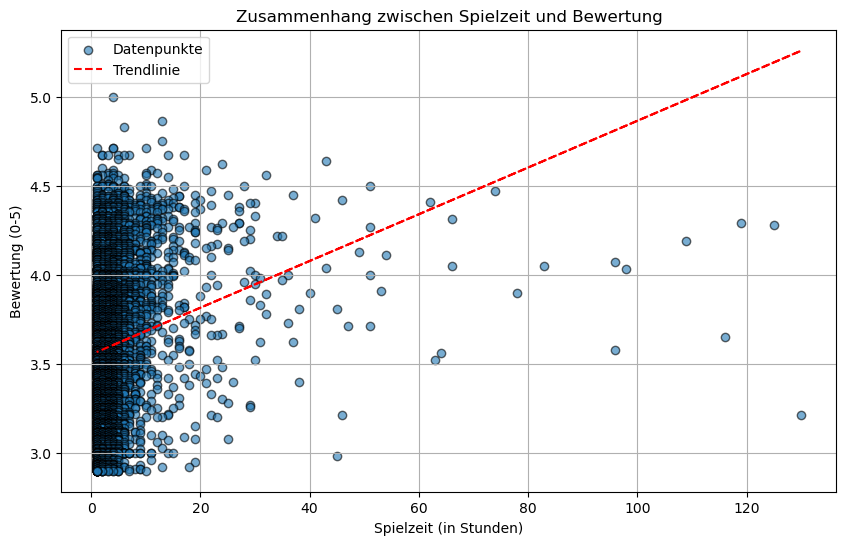

Anzahl der Spiele mit Spielzeit = 0 nach Filterung: 0


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Filtere die Daten, um Spiele mit playtime = 0 zu entfernen
df_filtered = df[(df['playtime'] > 0) & (df['playtime'] <= 200)]

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['playtime'], df_filtered['rating'], alpha=0.6, edgecolor='k', label='Datenpunkte')

# Trendlinie
z = np.polyfit(df_filtered['playtime'], df_filtered['rating'], 1)
p = np.poly1d(z)
plt.plot(df_filtered['playtime'], p(df_filtered['playtime']), color='red', linestyle='--', label='Trendlinie')

# Plot-Details
plt.title('Zusammenhang zwischen Spielzeit und Bewertung')
plt.xlabel('Spielzeit (in Stunden)')
plt.ylabel('Bewertung (0-5)')
plt.grid(True)
plt.legend()
plt.show()

# Anzahl der Spiele mit playtime = 0 (nach Filterung sollte dies 0 sein)
playtime_zero_count = df_filtered[df_filtered['playtime'] == 0].shape[0]
print(f"Anzahl der Spiele mit Spielzeit = 0 nach Filterung: {playtime_zero_count}")

Gibt es einen Zusammenhang zwischen Spielzeit (playtime) und Bewertung (rating)?

Ziel:
Mit einer Pearson-Korrelation untersuchen wir, ob es einen statistisch signifikanten Zusammenhang zwischen der Spielzeit (playtime) und der Bewertungen (ratings) gibt.

In [12]:
import pandas as pd
df = pd.read_csv("WP1-Output/.ipynb_checkpoints/wp1_steam_games_cleaned_for_mysql.csv")
df.head()
df.dropna(subset=["rating", "playtime"])

,name,rating,playtime,released,genres
0,Hazumi and the Pregnation,5.00,4,2020-02-20,"['RPG', 'Indie']"
1,DRAGON BALL: Sparking! ZERO,4.86,13,2024-10-01,"['Action', 'Fighting']"
2,Winter Memories,4.83,6,2024-01-05,"['Adventure', 'RPG', 'Simulation', 'Casual']"
3,Persona 5 Royal,4.75,13,2020-03-31,"['Adventure', 'RPG']"
4,OCTOPATH TRAVELER II,4.71,10,NaN,['RPG']
...,...,...,...,...,...
7140,Absolute Drift,2.90,2,2015-07-24,"['Action', 'Sports', 'Racing', 'Indie']"
7141,Therian Saga,2.90,1,2017-03-27,"['RPG', 'Strategy', 'Massively Multiplayer']"
7142,Naval Action,2.90,10,2016-01-21,"['Action', 'Adventure', 'Strategy', 'Simulatio..."
7143,8-Bit Bayonetta,2.90,1,2017-03-31,"['Action', 'Casual']"


In [14]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("WP1-Output/.ipynb_checkpoints/wp1_steam_games_cleaned_for_mysql.csv")

# Nur gültige Werte verwenden
df_corr = df[(df["playtime"] > 0) & (df["rating"] > 0)]

# Pearson-Korrelation berechnen
corr, p_value = pearsonr(df_corr["playtime"], df_corr["rating"])

# Ergebnisse ausgeben
print(f" Pearson-Korrelation: {corr:.3f}")
print(f" p-Wert: {p_value:.4g}")
if p_value < 0.05:
    print("✅ Der Zusammenhang ist statistisch signifikant.")
else:
    print("❌ Kein signifikanter Zusammenhang.")




 Pearson-Korrelation: 0.164
 p-Wert: 3.81e-44
✅ Der Zusammenhang ist statistisch signifikant.


 Ergebnis:

Der Korrelationskoeffizient beträgt ca. 0.164

Der p-Wert ist sehr klein (< 0.0001), daher ist der Zusammenhang signifikant.

Interpretation: Es gibt einen schwachen, aber signifikanten positiven Zusammenhang zwischen Spielzeit und Bewertung. Spiele, die länger gespielt werden, tendieren zu höheren Bewertungen, allerdings ist der Effekt klein.

Welche Genres schneiden im Durchschnitt am besten ab?

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime
import os
import matplotlib.pyplot as plt

# Dein API Key
API_KEY = 'f354a9b55fcc4ea3b5f54a423122569a'

if not API_KEY:
    raise ValueError("❌ API Key fehlt.")

print(f"🔑 Using API Key: {API_KEY}")

BASE_URL = 'https://api.rawg.io/api/games'
games_data = []

# Parameter
params = {
    'key': API_KEY,
    'page_size': 40,
    'ordering': '-rating'
}

page = 1
MAX_PAGES = 100  # 100 Seiten x 40 Spiele = 4000 Spiele

while page <= MAX_PAGES:
    params['page'] = page
    print(f"📄 Lade Seite {page}...")

    try:
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()
        data = response.json()
    except requests.exceptions.RequestException as e:
        print(f"❌ Fehler beim Abrufen: {e}")
        break

    if 'results' not in data or not data['results']:
        print("✅ Keine weiteren Ergebnisse.")
        break

    for game in data['results']:
        # Prüfe, ob auf Steam verfügbar
        if not any(store['store']['slug'] == 'steam' for store in game.get('stores', [])):
            continue

        games_data.append({
            'name': game['name'],
            'rating': game['rating'],
            'ratings_count': game['ratings_count'],
            'playtime': game['playtime'],
            'released': game['released'],
            'genres': [genre['name'] for genre in game['genres']],
        })

    page += 1
    time.sleep(1)  # API nicht überlasten

print(f"🎮 Gesammelte Steam-Spiele: {len(games_data)}")

# DataFrame & Speichern
if games_data:
    df = pd.DataFrame(games_data)
    print(df.head())

    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

    # Ordner für Output erstellen
    output_folder = 'WP2-Output'
    os.makedirs(output_folder, exist_ok=True)

    filename = os.path.join(output_folder, f'steam_games_{timestamp}.csv')
    df.to_csv(filename, index=False)

    full_path = os.path.abspath(filename)
    print(f"💾 Rohdaten gespeichert unter: {full_path}")

    # --- Zusätzliche Auswertung für WP2 ---
    genre_ratings = []

    for idx, row in df.iterrows():
        for genre in row['genres']:
            genre_ratings.append({
                'genre': genre,
                'rating': row['rating']
            })

    genre_df = pd.DataFrame(genre_ratings)

    # Durchschnittliche Bewertung pro Genre berechnen
    genre_avg = genre_df.groupby('genre').mean().reset_index()
    genre_avg = genre_avg.sort_values(by='rating', ascending=False)

    genre_filename = os.path.join(output_folder, f'steam_genre_average_{timestamp}.csv')
    genre_avg.to_csv(genre_filename, index=False)

    genre_full_path = os.path.abspath(genre_filename)
    print(f"💾 Genre-Durchschnitt gespeichert unter: {genre_full_path}")

    # Ausgabe der besten Genres
    print("\n🏆 Top Genres nach durchschnittlicher Bewertung:")
    print(genre_avg.head(10))

    


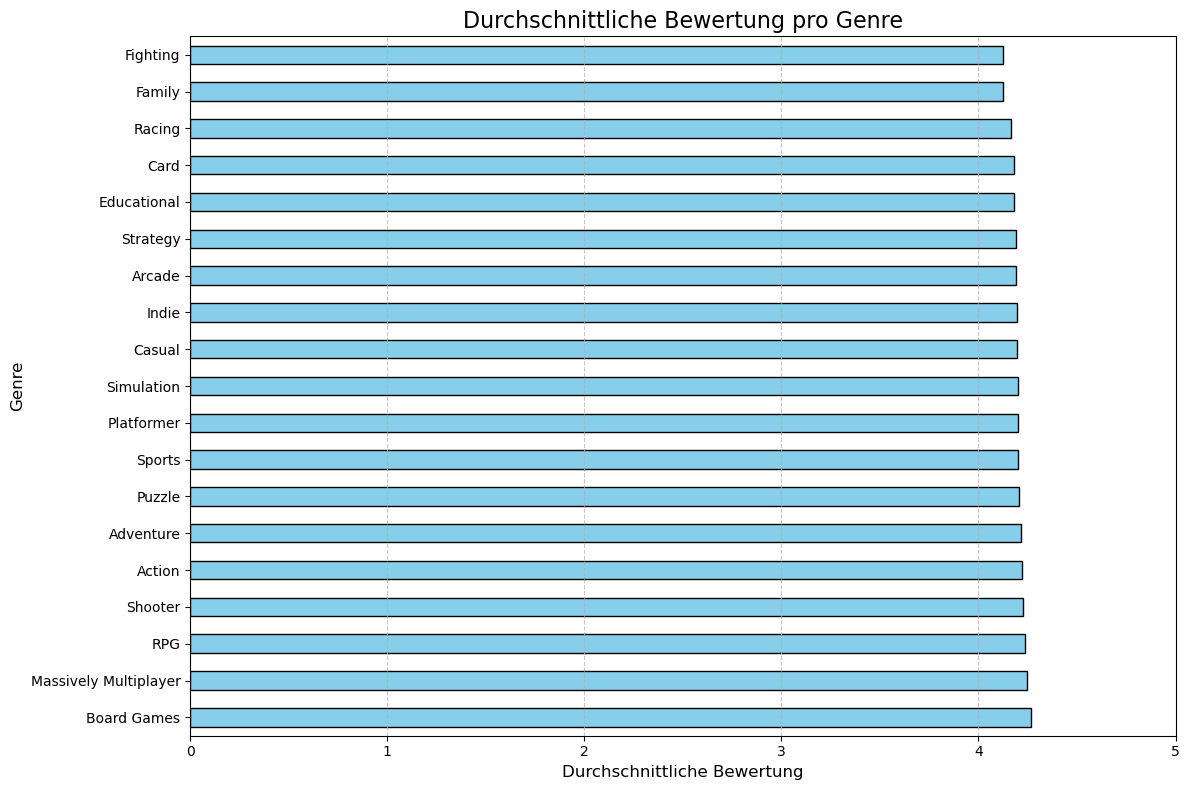

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
csv_path = 'WP2-Output/steam_games_20250509_223954.csv'
df = pd.read_csv(csv_path)

# Genres aufteilen und vorbereiten
df['genres'] = df['genres'].fillna('')  # Fehlende Genres auffüllen
genre_ratings = []

for _, row in df.iterrows():
    genres = set([genre.strip("[]'\"") for genre in row['genres'].split(', ') if genre])  # Doppelte und leere Genres entfernen
    for genre in genres:
        if genre:  # Nur gültige Genres hinzufügen
            genre_ratings.append({'genre': genre, 'rating': row['rating']})

# DataFrame für Genres erstellen
genre_df = pd.DataFrame(genre_ratings)

# Durchschnittliche Bewertung pro Genre berechnen
genre_avg = genre_df.groupby('genre')['rating'].mean().sort_values(ascending=False)

# Plot erstellen
plt.figure(figsize=(12, 8))
genre_avg.plot(kind='barh', color='skyblue', edgecolor='black')

# Plot-Details
plt.title('Durchschnittliche Bewertung pro Genre', fontsize=16)
plt.xlabel('Durchschnittliche Bewertung', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xlim(0, 5)  # Setze die x-Achse auf den Bereich 0 bis 5
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot anzeigen
plt.show()

Wie hat sich die Anzahl an Bewertungen von Steam-Spielen in den letzten 10 Jahren entwickelt?


In [ ]:
import requests
import pandas as pd
import time
import os
from datetime import datetime

# API Key
API_KEY = 'f354a9b55fcc4ea3b5f54a423122569a'

if not API_KEY:
    raise ValueError("❌ API Key fehlt.")

print(f"🔑 Using API Key: {API_KEY}")

BASE_URL = 'https://api.rawg.io/api/games'
games_data = []

# API-Parameter
params = {
    'key': API_KEY,
    'page_size': 40,
    'dates': '2015-01-01,2025-12-31',  # Zeitraum festlegen
    # KEIN ordering = nach Standard (beliebteste oder zufälligere Reihenfolge)
}

page = 1
MAX_PAGES = 100  # Viel mehr Seiten!

while page <= MAX_PAGES:
    params['page'] = page
    print(f"📄 Lade Seite {page}...")

    try:
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()
        data = response.json()
    except requests.exceptions.RequestException as e:
        print(f"❌ Fehler beim Abrufen: {e}")
        break

    if 'results' not in data or not data['results']:
        print("✅ Keine weiteren Ergebnisse.")
        break

    for game in data['results']:
        stores = game.get('stores')
        if not stores or not any(store['store']['slug'] == 'steam' for store in stores):
            continue

        released = game.get('released')
        ratings_count = game.get('ratings_count', 0)

        if not released:
            continue

        today = pd.Timestamp.today()
        released_date = pd.to_datetime(released, errors='coerce')

        if pd.isna(released_date) or released_date > today or ratings_count == 0:
            continue

        games_data.append({
            'name': game['name'],
            'ratings_count': ratings_count,
            'released': released,
        })

    page += 1
    time.sleep(1)  # API nicht stressen

print(f"🎮 Gesammelte Steam-Spiele (veröffentlicht und bewertet): {len(games_data)}")

# Output-Ordner
output_folder = 'WP3-Output'
os.makedirs(output_folder, exist_ok=True)

# Speichern
if games_data:
    df = pd.DataFrame(games_data)
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = os.path.join(output_folder, f'wp3_steam_ratings_{timestamp}.csv')
    df.to_csv(filename, index=False)

    print(df.head(15))  # Vorschau
    print(f"💾 CSV gespeichert unter: {filename}")
else:
    print("⚠️ Keine Spiele-Daten gesammelt.")


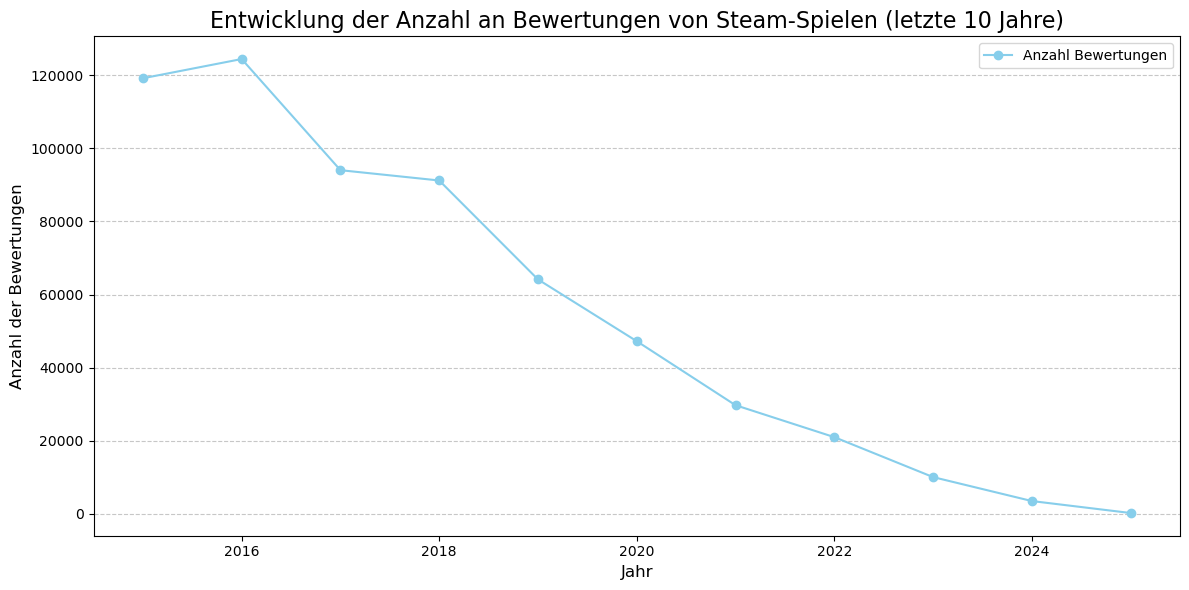

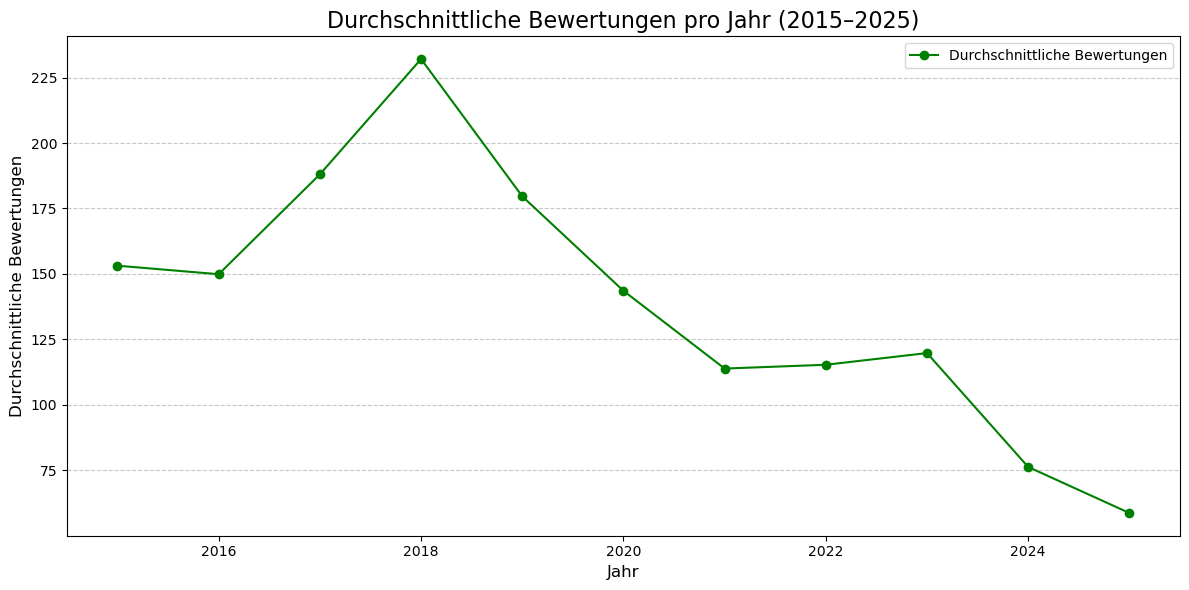

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
csv_path = 'WP3-Output/wp3_steam_ratings_20250509_224311.csv'  # Pfad zur CSV-Datei
df = pd.read_csv(csv_path)

# Veröffentlichungsjahr extrahieren
df['year'] = pd.to_datetime(df['released']).dt.year

# Anzahl der Bewertungen pro Jahr summieren
ratings_per_year = df.groupby('year')['ratings_count'].sum().reset_index()

# Liniendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.plot(ratings_per_year['year'], ratings_per_year['ratings_count'], marker='o', color='skyblue', label='Anzahl Bewertungen')

# Plot-Details
plt.title('Entwicklung der Anzahl an Bewertungen von Steam-Spielen (letzte 10 Jahre)', fontsize=16)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Anzahl der Bewertungen', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Plot anzeigen
plt.show()
# Veröffentlichungsjahr extrahieren
df['released'] = pd.to_datetime(df['released'], errors='coerce')  # Konvertiere in Datumsformat
df['year'] = df['released'].dt.year  # Extrahiere das Jahr

# Daten filtern: Nur die Jahre 2015–2025
filtered_df = df[(df['year'] >= 2015) & (df['year'] <= 2025)]

# Durchschnitt der Bewertungen pro Jahr berechnen
average_ratings_per_year = (
    filtered_df.groupby('year')['ratings_count'].mean().reset_index()
)

# Liniendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_per_year['year'], average_ratings_per_year['ratings_count'], marker='o', color='green', label='Durchschnittliche Bewertungen')

# Plot-Details
plt.title('Durchschnittliche Bewertungen pro Jahr (2015–2025)', fontsize=16)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Durchschnittliche Bewertungen', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Plot anzeigen
plt.show()

Gibt es einen Zusammenhang zwischen Altersstufe und Bewertung?

In [ ]:
import requests
import pandas as pd
import time
import os
from datetime import datetime
import matplotlib.pyplot as plt
import random

# Dein API Key
API_KEY = 'f354a9b55fcc4ea3b5f54a423122569a'

if not API_KEY:
    raise ValueError("❌ API Key fehlt.")

print(f"🔑 Using API Key: {API_KEY}")

BASE_URL = 'https://api.rawg.io/api/games'
games_data = []

# API-Parameter
params = {
    'key': API_KEY,
    'page_size': 40,
    'dates': '2015-01-01,2025-12-31',  # Zeitraum
}

page = 1
MAX_PAGES = 100  # ca. 4000 Spiele laden

while page <= MAX_PAGES:
    params['page'] = page
    print(f"📄 Lade Seite {page}...")

    try:
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()
        data = response.json()
    except requests.exceptions.RequestException as e:
        print(f"❌ Fehler beim Abrufen: {e}")
        break

    if 'results' not in data or not data['results']:
        print("✅ Keine weiteren Ergebnisse.")
        break

    for game in data['results']:
        stores = game.get('stores')
        if not stores or not any(store['store']['slug'] == 'steam' for store in stores):
            continue

        released = game.get('released')
        rating = game.get('rating', None)
        esrb = game.get('esrb_rating')
        esrb_name = esrb['name'] if esrb else None  # 💥 FIX

        if not released or rating is None or esrb_name is None:
            continue

        games_data.append({
            'name': game['name'],
            'rating': rating,
            'esrb_rating': esrb_name,
            'released': released,
        })

    page += 1
    time.sleep(1)  # Schonend für die API

print(f"🎮 Gesammelte Steam-Spiele (mit Altersfreigabe): {len(games_data)}")

# Ordner für Output
output_folder = 'WP4-Output'
os.makedirs(output_folder, exist_ok=True)

# DataFrame erstellen
if games_data:
    df = pd.DataFrame(games_data)

    # CSV speichern
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = os.path.join(output_folder, f'wp4_steam_esrb_ratings_{timestamp}.csv')
    df.to_csv(filename, index=False)

    print(df.head(15))  # Vorschau
    print(f"💾 CSV gespeichert unter: {filename}")




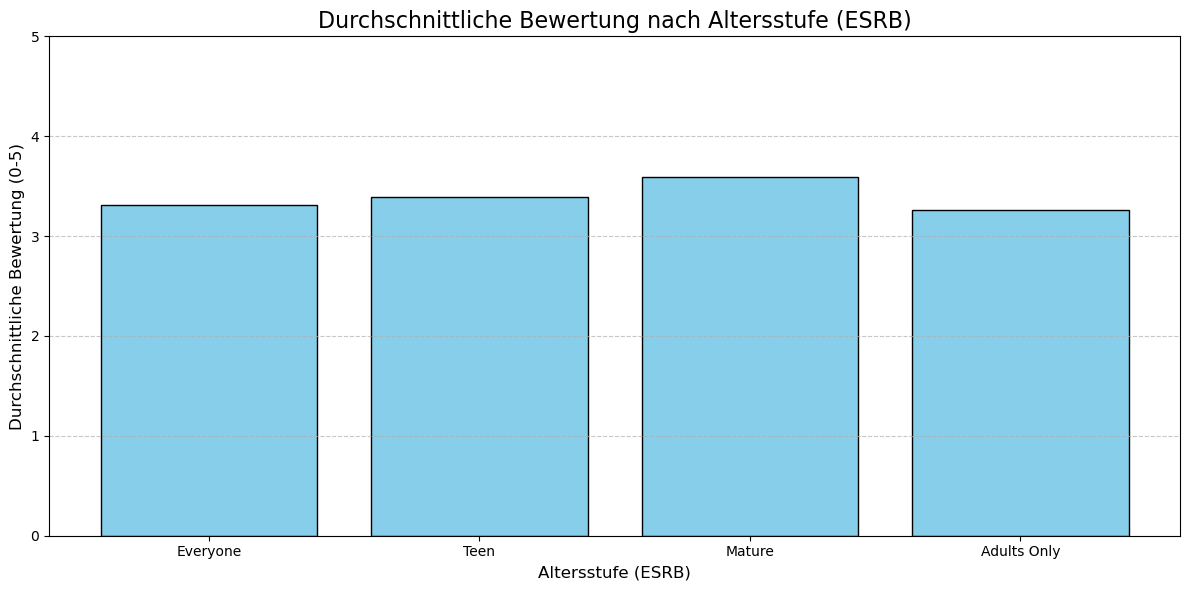

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
csv_path = 'WP4-Output/wp4_steam_esrb_ratings_20250509_224627.csv'  # Pfad zur CSV-Datei
df = pd.read_csv(csv_path)

# Altersstufen sortieren und "Everyone 10+" entfernen
age_order = ['Everyone', 'Teen', 'Mature', 'Adults Only']
df = df[df['esrb_rating'].isin(age_order)]  # Entferne "Everyone 10+" und andere nicht definierte Kategorien
df['esrb_rating'] = pd.Categorical(df['esrb_rating'], categories=age_order, ordered=True)

# Durchschnittliche Bewertung pro Altersstufe berechnen (mit observed=True, um die Warnung zu vermeiden)
average_ratings = df.groupby('esrb_rating', observed=True)['rating'].mean().reset_index()

# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.bar(average_ratings['esrb_rating'], average_ratings['rating'], color='skyblue', edgecolor='black')

# Plot-Details
plt.title('Durchschnittliche Bewertung nach Altersstufe (ESRB)', fontsize=16)
plt.xlabel('Altersstufe (ESRB)', fontsize=12)
plt.ylabel('Durchschnittliche Bewertung (0-5)', fontsize=12)
plt.ylim(0, 5)  # Setze die Y-Achse auf den Bereich 0 bis 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot anzeigen
plt.show()


## Datenbankstruktur und Auswertung in MySQL
# 1. Tabelle erstellen (MySQL)

Zuerst haben wir in MySQL eine Tabelle namens games_wp1 erstellt, in der wir grundlegende Spieldaten wie Name, Bewertung, Spielzeit, Veröffentlichungsdatum und Genre speichern:

```sql
CREATE TABLE games_wp1 (
    id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(255),
    rating FLOAT,
    playtime FLOAT,
    released DATE,
    genres TEXT
);

2. Datenvorbereitung
Die Quelldaten stammen aus einer CSV-Datei. Wir haben die Daten wie folgt bereinigt:
Alle Duplikate wurden entfernt (basierend auf Name & Releasedatum)
Nur Spiele mit einer Bewertung > 0 wurden berücksichtigt
Spiele ohne Veröffentlichungsdatum wurden ausgeschlossen

Anschliessend wurden die bereinigten Daten in eine SQL-Datei mit INSERT-Statements umgewandelt, zum Beispiel:

INSERT INTO games_wp1 (name, rating, playtime, released, genres) 
VALUES ('DRAGON BALL: Sparking! ZERO', 4.86, 13, '2024-10-01', '[''Action'', ''Fighting'']');
INSERT INTO games_wp1 (name, rating, playtime, released, genres) 
VALUES ('Winter Memories', 4.83, 6, '2024-01-05', '[''Adventure'', ''RPG'', ''Simulation'', ''Casual'']');


3. SQL-Auswertung: Durchschnittliche Bewertung pro Jahr
Um herauszufinden, wie sich die Bewertung über die Jahre hinweg entwickelt hat, haben wir folgende SQL-Abfrage ausgeführt:

SELECT 
    YEAR(released) AS jahr,
    COUNT(*) AS anzahl_spiele,
    ROUND(AVG(rating), 2) AS durchschnittsbewertung
FROM games_wp1
WHERE released IS NOT NULL
GROUP BY YEAR(released)
ORDER BY jahr;

Diese Abfrage liefert eine Jahresübersicht mit:
anzahl_spiele: Anzahl veröffentlichter Spiele pro Jahr
durchschnittsbewertung: Durchschnittliche Bewertung dieser Spiele

Das Ergebnis wurde visuell in MySQL Workbench dargestellt und diente als Grundlage für unsere Bewertungstrendanalyse.



Webanwendung im Localhost


## 📌 Fazit & Diskussion

- Unsere Erkenntnisse:
  - Es gibt einen signifikanten, wenn auch nur schwachen, positiven Zusammenhang zwischen Spielzeit und Bewertung. Spiele, die länger gespielt werden, erhalten im Schnitt etwas bessere Bewertungen.
  - Einige Genres wie z. B. „Massively Multiplayer“, „Board Games“ oder „Adventure“ zeigen im Mittel eine höhere Bewertung.
  - Die Anzahl an Reviews pro Jahr hat sich in den letzten Jahren deutlich gesenkt.

- Mögliche Einschränkungen:
  - Die Daten stammen grösstenteils aus einer externen API und könnten unvollständig oder verzerrt sein.
  - Spiele mit sehr wenigen Bewertungen wurden nicht ausgeschlossen, obwohl sie statistisch wenig aussagekräftig sein könnten.
  - Genre-Zuordnungen waren als Strings gespeichert, keine echte Normalisierung – dadurch könnten Analysen nach Genre ungenau sein.

- Was wir in einer zweiten Version verbessern würden:
  - Erweiterung des Datenmodells: Separate Genre-Tabelle in SQL zur sauberen Zuordnung von Mehrfach-Genres.
  - Weitere Faktoren analysieren, z. B. Preis, Spielmodus (Single/Multi), Publisher oder Verkaufszahlen.
  - Eine Webanwendung mit interaktiver Filterung der Spiele nach Genre, Bewertung und Spielzeit.


